*Source: Mia
SE171703*

## Import the required libraries

In [5]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import *

## Importing the Dataset

In [6]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1. Dataset Description

#### a.	Dataset Statistics

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


#### b. Convert categorical features into numerical features

In [8]:
df = pd.DataFrame(data, columns = ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'])
print(df)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [9]:
le = preprocessing.LabelEncoder()
sex_label = le.fit_transform(df['sex'])
print(list(le.classes_))
print(le.transform(df['sex']))

['female', 'male']
[0 1 1 ... 0 0 0]


In [10]:
le = preprocessing.LabelEncoder()
region_label =  le.fit_transform(df['region'])
print(list(le.classes_))
print(le.transform(df['region']))

['northeast', 'northwest', 'southeast', 'southwest']
[3 2 2 ... 2 3 1]


In [11]:
le = preprocessing.LabelEncoder()
smoker_label = le.fit_transform(df['smoker'])
print(list(le.classes_))
print(le.transform(df['smoker']))

['no', 'yes']
[1 0 0 ... 0 0 1]


In [12]:
#append new numerical columns to the dataframe
df.drop("sex", axis = 1, inplace = True)
df['sex'] = sex_label
df.drop("region", axis = 1, inplace = True)
df['region'] = region_label
df.drop("smoker", axis = 1, inplace = True)
df['smoker'] = smoker_label

In [13]:
df.head(10)

,age,bmi,children,charges,sex,region,smoker
0,19,27.900,0,16884.92400,0,3,1
1,18,33.770,1,1725.55230,1,2,0
2,28,33.000,3,4449.46200,1,2,0
3,33,22.705,0,21984.47061,1,1,0
4,32,28.880,0,3866.85520,1,1,0
5,31,25.740,0,3756.62160,0,2,0
6,46,33.440,1,8240.58960,0,2,0
7,37,27.740,3,7281.50560,0,1,0
8,37,29.830,2,6406.41070,1,0,0
9,60,25.840,0,28923.13692,0,1,0


#### c. Correlation Study

In [14]:
corr = df.corr()

<AxesSubplot: >

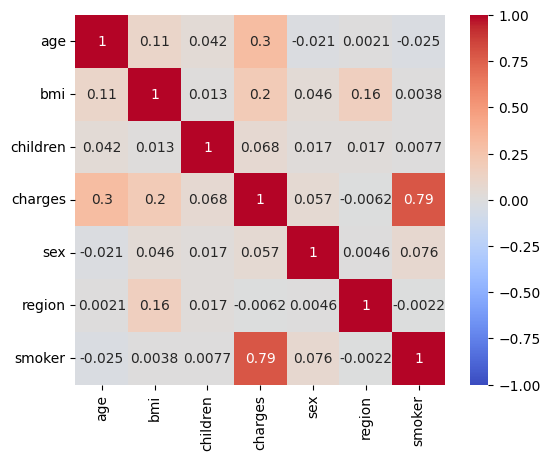

In [15]:
sns.heatmap(corr, vmin = -1.0, vmax = 1, annot=True, square=True, cmap='coolwarm')

### 2.	Determining Normality: Making our target variable normally distributed often will lead to better results If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values. How can we tell if our target is normally distributed?
Transformations techniques to get or approach normal distribution:
a.	Square root
b.	Log
c.	Box cox


> Square root transformation

In [16]:
df_square = np.sqrt(df)

Text(0.5, 1.0, 'Distribution of Original Charges')

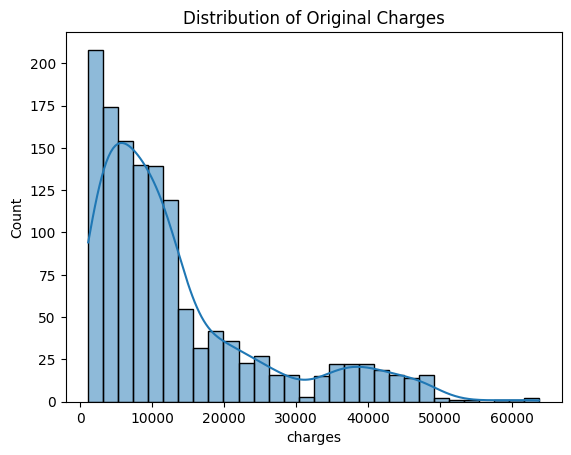

In [17]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Original Charges')

Text(0.5, 1.0, 'Distribution of Square Charges')

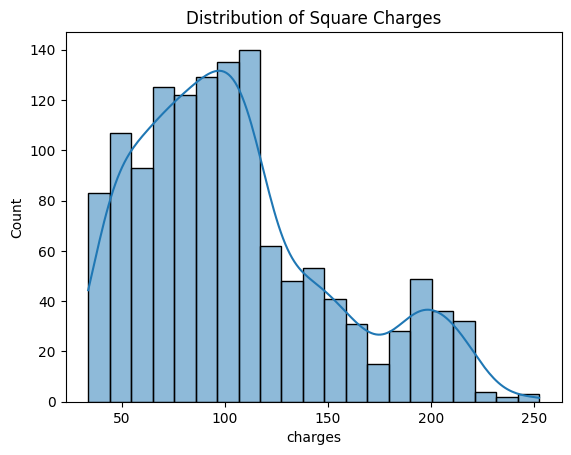

In [18]:
sns.histplot(df_square['charges'], kde=True)
plt.title('Distribution of Square Charges')

> Log transformation

In [19]:
df_log = np.log(df)

c:\Python310\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


Text(0.5, 1.0, 'Distribution of Original Charges')

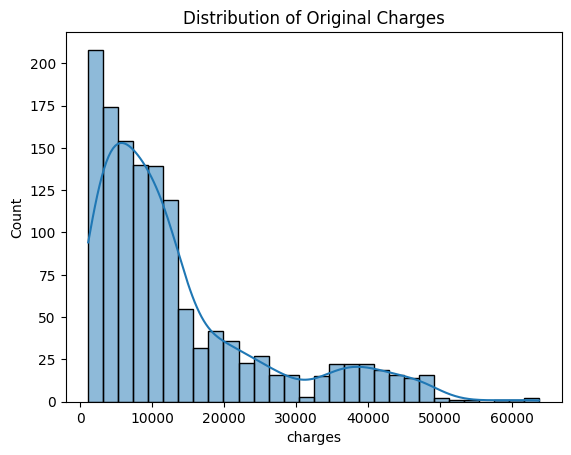

In [20]:
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Original Charges')

Text(0.5, 1.0, 'Distribution of Log Charges')

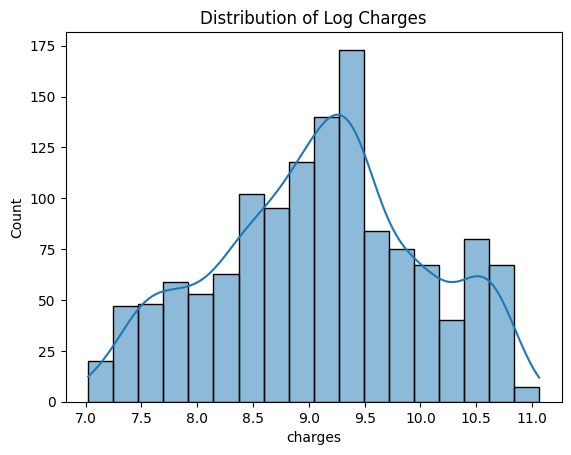

In [21]:
sns.histplot(df_log['charges'], kde=True)
plt.title('Distribution of Log Charges')

### 3.	Applying Various Regression Models

In [22]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(df.drop('charges', axis=1), df['charges'], test_size=0.2, random_state=42)

In [23]:
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test, y_test))
y_pred_lr = lr.predict(X_test)

0.7833463107364539


In [24]:
dt = tree.DecisionTreeRegressor()
dt.fit(X_train, y_train)
print(dt.score(X_test, y_test))
y_pred_dt = dt.predict(X_test)

0.7328167382459437


In [25]:
rf = ensemble.RandomForestRegressor()
rf.fit(X_train, y_train)
print(rf.score(X_test, y_test))
y_pred_rf = rf.predict(X_test)

0.8612625094387418


In [26]:
from sklearn.metrics import mean_squared_error
mse_lr = mean_squared_error(y_test, y_pred_lr)
mse_dt = mean_squared_error(y_test, y_pred_dt)
mse_rf = mean_squared_error(y_test, y_pred_rf)

In [27]:
print('Linear Regression MSE: ', mse_lr)
print('Decision Tree MSE: ', mse_dt)
print('Random Forest MSE: ', mse_rf)

Linear Regression MSE:  33635210.431178406
Decision Tree MSE:  41479862.46315171
Random Forest MSE:  21538819.419987224


### 4.	Applying various linear regression models with advanced techniques
Through the following steps for Vanilla Linear Regression, Lasso Regression, Ridge Regression and ElasticNetCV:
-	Chain multiple data processing steps together using Pipeline
-	Use the KFolds object to split data into multiple folds.
-	Perform cross validation using SciKit Learn with cross_val_predict and GridSearchCV


In [28]:
#importing the required libraries 
from sklearn.model_selection import train_test_split, KFold, GridSearchCV, cross_val_predict
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNetCV
from sklearn.metrics import mean_squared_error, r2_score

In [29]:
X = df.drop('charges', axis=1)
y = df['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Linear Regression**

In [30]:
lr_pipe = make_pipeline(StandardScaler(), LinearRegression())
lr_cv_predictions = cross_val_predict(lr_pipe, X_train, y_train, cv=5)
lr_mse = mean_squared_error(y_train, lr_cv_predictions)
lr_r2 = r2_score(y_train, lr_cv_predictions)
print('Linear Regression MSE', lr_mse)
print('Linear Regression R-squared:', lr_r2)

Linear Regression MSE 37831591.58984441
Linear Regression R-squared: 0.7378878802932889


**Lasso Regression**

In [31]:
ls_pipe = make_pipeline(StandardScaler(), Lasso())
ls_cv_predictions = cross_val_predict(ls_pipe, X_train, y_train, cv=5)
ls_mse = mean_squared_error(y_train, ls_cv_predictions)
ls_r2 = r2_score(y_train, ls_cv_predictions)
print('Lasso Regression MSE: ', ls_mse)
print('Lasso Regression R-squared:', ls_r2)

Lasso Regression MSE:  37830449.20786589
Lasso Regression R-squared: 0.73789579516415


**Ridge Regression**

In [32]:
ridge_pipe = make_pipeline(StandardScaler(), Ridge())
ridge_cv_predictions = cross_val_predict(ridge_pipe, X_train, y_train, cv=5)
ridge_mse = mean_squared_error(y_train, ridge_cv_predictions)
ridge_r2 = r2_score(y_train, ridge_cv_predictions)
print('Ridge Regression MSE: ', ridge_mse)
print('Ridge Regression R-squared:', ridge_r2)

Ridge Regression MSE:  37830241.60787753
Ridge Regression R-squared: 0.7378972334983759


**Elastic Net**

In [33]:
elastic_pipe = make_pipeline(StandardScaler(), ElasticNetCV(cv=5))
elastic_cv_predictions = cross_val_predict(elastic_pipe, X_train, y_train, cv=5)
elastic_mse = mean_squared_error(y_train, elastic_cv_predictions)
elastic_r2 = r2_score(y_train, elastic_cv_predictions)
print('ElasticNetCV MSE:', elastic_mse)
print('ElasticNetCV R-squared:', elastic_r2)


ElasticNetCV MSE: 125113241.19473703
ElasticNetCV R-squared: 0.13316634392583337


### 5.	Models Flaws and Strength

*Linear Regression*
- Strength:  Easy to implement, easy to train, easy to perform relationships between each data point in the dataset.
- Flaws: cannot handle outliers well

*Lasso Regression*
- Strength: nice perfoming of features selection and the irrelevant variables
- Flaws: not good to perform relevant features

*Ridge Regression*
- Strength: handles multicollinearity well
- Flaws: does not perform feature selection

*Elastic Net*
- Strength: performs well when there are many correlated features
- Flaws: not perform well when the relevant features have similar magnitudes